In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1.   Load Data
The dataset expert we are using for ml model training/testing:

> The raw network packets of the UNSW-NB 15 data set is created by the IXIA PerfectStorm tool in the Cyber Range Lab, UNSW Canberra for generating a hybrid of real modern normal activities and synthetic contemporary attack behaviours.

> Tcpdump tool is utilised to capture 100 GB of the raw traffic (e.g., Pcap files). This data set has nine families of attacks,namely, Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms.

> The Argus, Bro-IDS tools are utilised and twelve algorithms are developed to generate totally 49 features with the class label. These features are described in UNSW-NB15_freatures.csv file. The total number of records is two millions and 540,044 which are stored in the four CSV files, namely, UNSW-NB15_1.csv, UNSW-NB15_1.csv, UNSW-NB15_1.csv and UNSW-NB15_1.csv. The ground truth table is named UNSW-NB15_GT.CSV and the list of event file is called UNSW-NB15_LIST_EVENTS.

> A partition from this data set is configured as a training set and testing set, namely, UNSW_NB15_training-set.csv and UNSW_NB15_testing-set respectively. The number of records in the training set is 175,341 records and the testing set is 82,332 records from different the types of attack and normal.





In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load training and testing data
train_df = pd.read_csv('/content/drive/MyDrive/MS AI/F2024/CMPE 295B/Colab Notebooks/UNSW-NB15 Dataset/CSV Folder/Training and Testing Sets/UNSW_NB15_training-set.csv')
test_df = pd.read_csv('/content/drive/MyDrive/MS AI/F2024/CMPE 295B/Colab Notebooks/UNSW-NB15 Dataset/CSV Folder/Training and Testing Sets/UNSW_NB15_testing-set.csv')

# 2.   EDA & Data Visualization


*   For the Service column, some values are listed as "-", we need to either fill those in or drop them
*   List item



In [4]:
train_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [6]:
train_df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [7]:
# Describe further info on the service column
train_df["service"].describe()

,service
count,175341
unique,13
top,-
freq,94168


In [8]:
# plt.bar(train_df["service"].values, train_df["service"].index)
# plt.xlabel('Values')
# plt.ylabel('Count')
# plt.title('Count of Variables in Column')
# plt.show()

In [9]:
train_df["state"].describe()

,state
count,175341
unique,9
top,INT
freq,82275


# 3. Data Preprocessing

## Clean Columns
Features that will be dropped from the training/testing DFs are the following and these are chosen to be dropped due to accessability reasons, or whether they were considered to be unnecessary in our use case.

*   state
*   service
*   trans_depth
*   response_body_len?
*   Stime
*   Ltime
*   is_sm_ips_ports
*   ct_srv_src
*   ct_state_ttl
*   ct_dst_ltm
*   ct_src_dport_ltm
*   ct_dst_sport_ltm
*   ct_dst_src_ltm
*   is_ftp_login
*   ct_ftp_cmd
*   ct_flw_http_mthd
*   ct_src_ltm
*   ct_srv_dst
*   is_sm_ips_ports
*   attack_cat, label => these are the target or labeled values so not really delete but use as gt


In [10]:
# Function to delete columns
def delete_columns(df, columns):
  for column in columns:
    if column in df.columns:
      df.drop(column, axis=1, inplace=True)
    else:
      print(f"Column '{column}' not found in the DataFrame.")

# Delete following columns from train and test DFs
columns_to_delete = ["id", "state", "service", "trans_depth", "response_body_len", "Stime", "Ltime", "rate", "is_sm_ips_ports", "ct_srv_src", "ct_state_ttl", "ct_dst_ltm",
                     "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "is_ftp_login", "ct_ftp_cmd", "ct_flw_http_mthd", "ct_src_ltm", "ct_srv_dst",
                     "is_sm_ips_ports", "attack_cat"]

delete_columns(train_df, columns_to_delete)
delete_columns(test_df, columns_to_delete)

Column 'Stime' not found in the DataFrame.
Column 'Ltime' not found in the DataFrame.
Column 'is_sm_ips_ports' not found in the DataFrame.
Column 'Stime' not found in the DataFrame.
Column 'Ltime' not found in the DataFrame.
Column 'is_sm_ips_ports' not found in the DataFrame.


In [11]:
train_df.columns

Index(['dur', 'proto', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'label'],
      dtype='object')

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   dur     175341 non-null  float64
 1   proto   175341 non-null  object 
 2   spkts   175341 non-null  int64  
 3   dpkts   175341 non-null  int64  
 4   sbytes  175341 non-null  int64  
 5   dbytes  175341 non-null  int64  
 6   sttl    175341 non-null  int64  
 7   dttl    175341 non-null  int64  
 8   sload   175341 non-null  float64
 9   dload   175341 non-null  float64
 10  sloss   175341 non-null  int64  
 11  dloss   175341 non-null  int64  
 12  sinpkt  175341 non-null  float64
 13  dinpkt  175341 non-null  float64
 14  sjit    175341 non-null  float64
 15  djit    175341 non-null  float64
 16  swin    175341 non-null  int64  
 17  stcpb   175341 non-null  int64  
 18  dtcpb   175341 non-null  int64  
 19  dwin    175341 non-null  int64  
 20  tcprtt  175341 non-null  float64
 21  synack  17

In [13]:
train_df["proto"].unique()

array(['tcp', 'udp', 'arp', 'ospf', 'icmp', 'igmp', 'rtp', 'ddp',
       'ipv6-frag', 'cftp', 'wsn', 'pvp', 'wb-expak', 'mtp', 'pri-enc',
       'sat-mon', 'cphb', 'sun-nd', 'iso-ip', 'xtp', 'il', 'unas',
       'mfe-nsp', '3pc', 'ipv6-route', 'idrp', 'bna', 'swipe',
       'kryptolan', 'cpnx', 'rsvp', 'wb-mon', 'vmtp', 'ib', 'dgp',
       'eigrp', 'ax.25', 'gmtp', 'pnni', 'sep', 'pgm', 'idpr-cmtp',
       'zero', 'rvd', 'mobile', 'narp', 'fc', 'pipe', 'ipcomp', 'ipv6-no',
       'sat-expak', 'ipv6-opts', 'snp', 'ipcv', 'br-sat-mon', 'ttp',
       'tcf', 'nsfnet-igp', 'sprite-rpc', 'aes-sp3-d', 'sccopmce', 'sctp',
       'qnx', 'scps', 'etherip', 'aris', 'pim', 'compaq-peer', 'vrrp',
       'iatp', 'stp', 'l2tp', 'srp', 'sm', 'isis', 'smp', 'fire', 'ptp',
       'crtp', 'sps', 'merit-inp', 'idpr', 'skip', 'any', 'larp', 'ipip',
       'micp', 'encap', 'ifmp', 'tp++', 'a/n', 'ipv6', 'i-nlsp',
       'ipx-n-ip', 'sdrp', 'tlsp', 'gre', 'mhrp', 'ddx', 'ippc', 'visa',
       'secure-vmtp', 

## Normalize/Standardization
Now that we have the columns we'll be using, let's normalize and standarize our columns. First some research as to what we need to do:
- Binary column can be left alone (it's also the target column)
- For the numerical column we have a wide variety of numerical ranges, will normalize those values
- For categorical columns, we can approach this with one-hot encoding, but because there are a high number of categories, we will use "dummy-encoding" to convert them to numerical values


In [14]:
# Categorize the columns by value type
binary_columns = ["label"]
numerical_columns = ["dur", "spkts", "dpkts", "sbytes", "dbytes", "sttl", "dttl", "sloss", "dloss", "sinpkt", "dinpkt",
                     "sjit", "djit", "swin", "stcpb", "dtcpb", "dwin", "tcprtt", "synack", "smean", "dmean"]
categorical_columns = ["proto"]

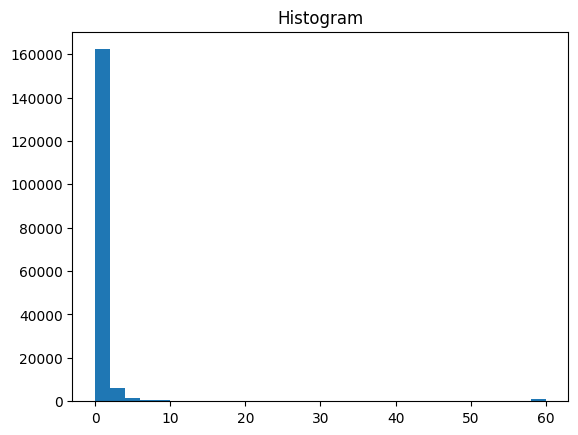

Skewness: 7.495996417448646


In [15]:
import pandas as pd
from scipy.stats import skew

# Example data
data = train_df["dur"]

# Plot histogram
plt.hist(data, bins=30)
plt.title('Histogram')
plt.show()

# Calculate skewness
skewness_value = skew(data)
print(f'Skewness: {skewness_value}')

In [16]:
def visualize_numerical_columns(df, numerical_columns):
  n_features = len(numerical_columns)
  n_cols = 3  # Number of columns in the grid
  n_rows = (n_features + n_cols - 1) // n_cols  # Calculate rows based on number of features

  fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
  axes = axes.flatten()  # Flatten the axes array for easy iteration

  for i, feature in enumerate(numerical_columns):
    sns.histplot(df[feature].dropna(), bins=30, kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

  # Hide any empty subplots
  for j in range(i + 1, n_rows * n_cols):
      axes[j].axis('off')

  plt.tight_layout()
  plt.show()

From the graphs aboce, we can notice there is a positive skewness for some features(spkts, dpkts, sbytes, dbytes, sinpkt, dinpkt).

### Before and after of spkts feature applying log transformations

In [17]:
train_df['spkts_log'] = np.log1p(train_df['spkts'])

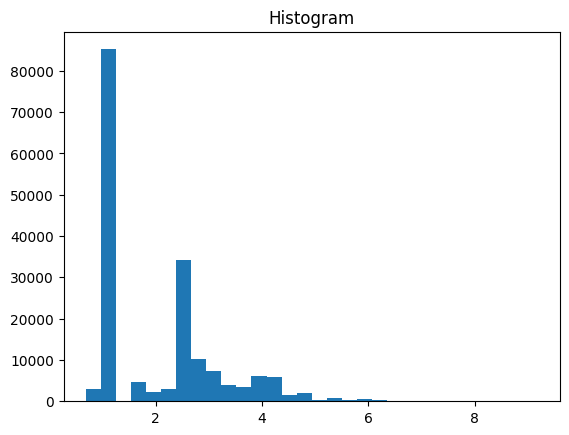

Skewness: 1.116320003035074


In [18]:
# Example data
data = train_df['spkts_log']

# Plot histogram
plt.hist(data, bins=30)
plt.title('Histogram')
plt.show()

# Calculate skewness
skewness_value = skew(data)
print(f'Skewness: {skewness_value}')

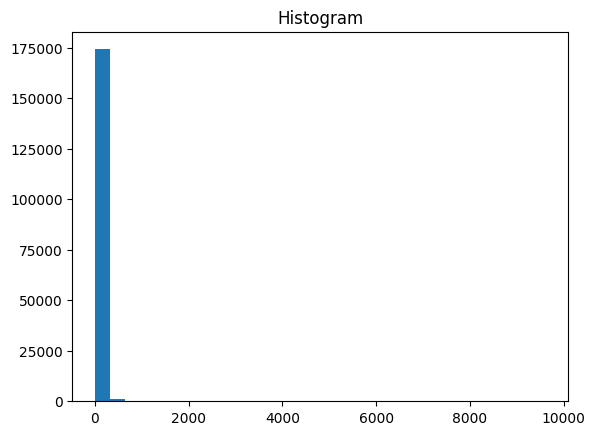

Skewness: 40.21735857424057


In [19]:
# Example data
data = train_df['spkts']

# Plot histogram
plt.hist(data, bins=30)
plt.title('Histogram')
plt.show()

# Calculate skewness
skewness_value = skew(data)
print(f'Skewness: {skewness_value}')

### Scaling Skewed Features

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def scale_skewed_features(df, skewed_features):
  other_features = ["dur", "sttl", "dttl", "sloss", "dloss","sjit", "djit", "swin", "stcpb", "dtcpb", "dwin", "tcprtt", "synack", "smean", "dmean"]
  # Log transform skewed features
  for feature in skewed_features:
      df[feature + '_log'] = np.log1p(df[feature])

  # Apply standard scaling to standardize all features
  scaler = StandardScaler()
  scaled_features = scaler.fit_transform(df[[f'{feature}_log' for feature in skewed_features] + other_features])

  # Convert scaled features back to DataFrame
  scaled_data = pd.DataFrame(scaled_features, columns=[f'{feature}_log' for feature in skewed_features] + other_features)
  return scaled_data

In [21]:
skewed_features = ['spkts', 'dpkts', 'sbytes', 'dbytes', 'sinpkt', 'dinpkt']
scaled_train_df = scale_skewed_features(train_df, skewed_features)
scaled_test_df = scale_skewed_features(test_df, skewed_features)

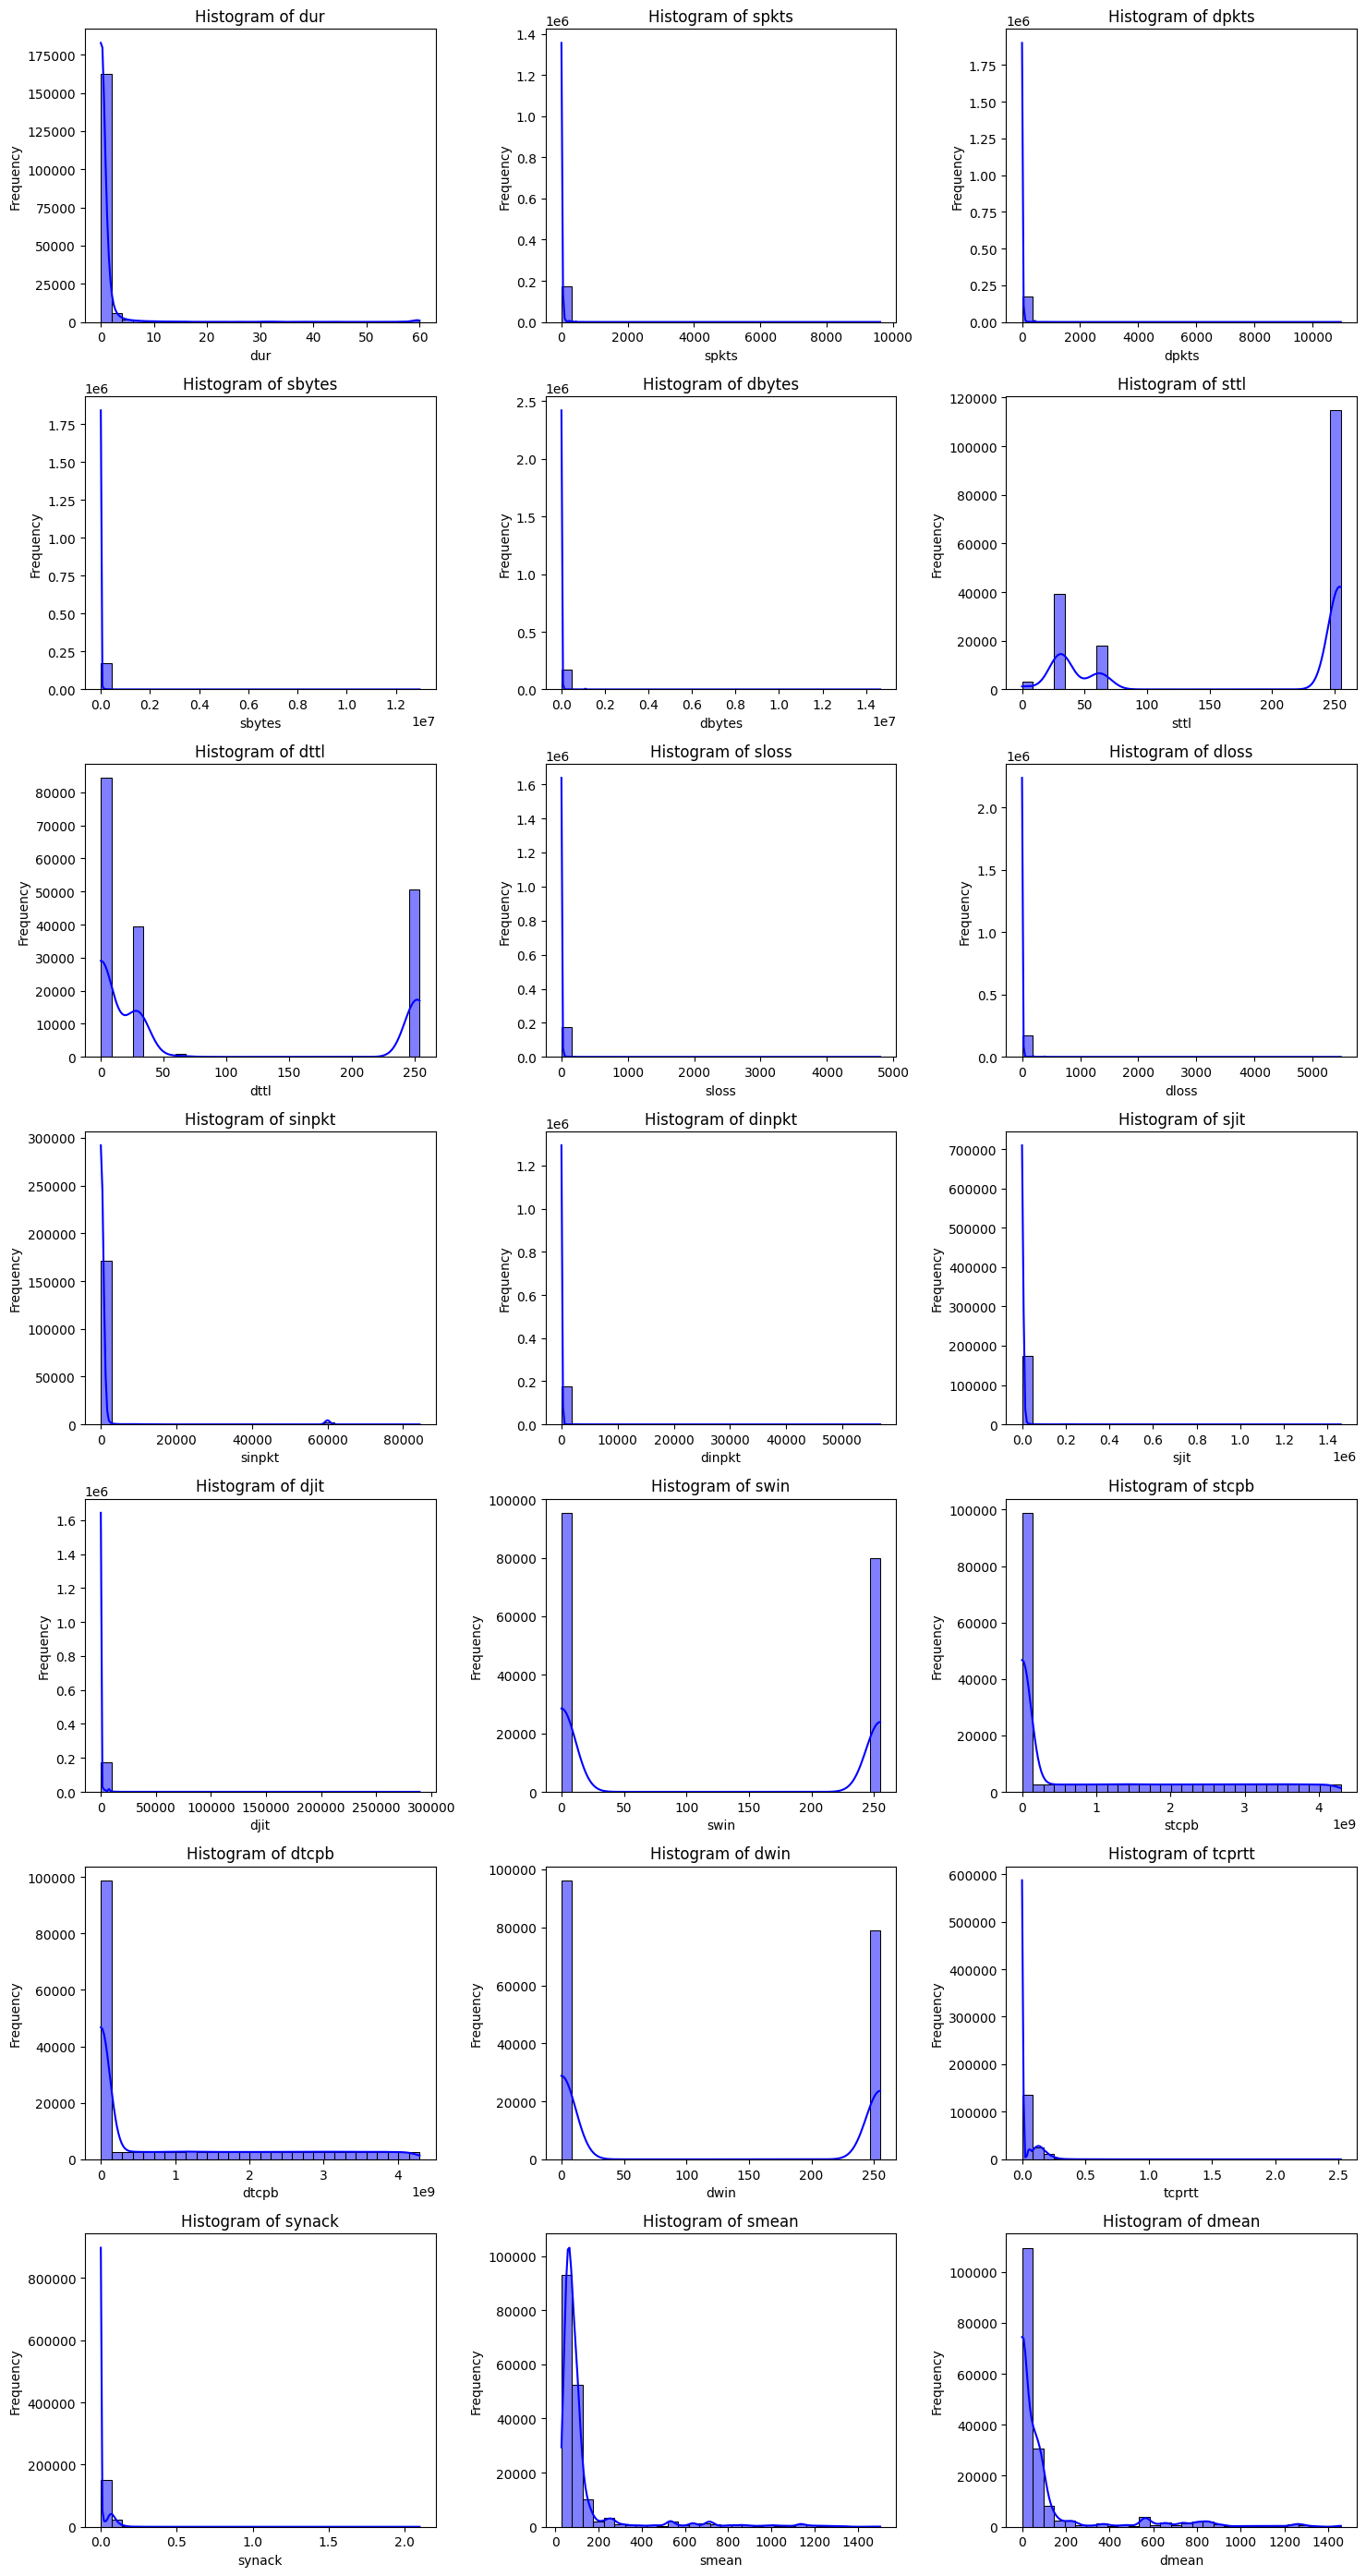

In [22]:
visualize_numerical_columns(train_df, numerical_columns)

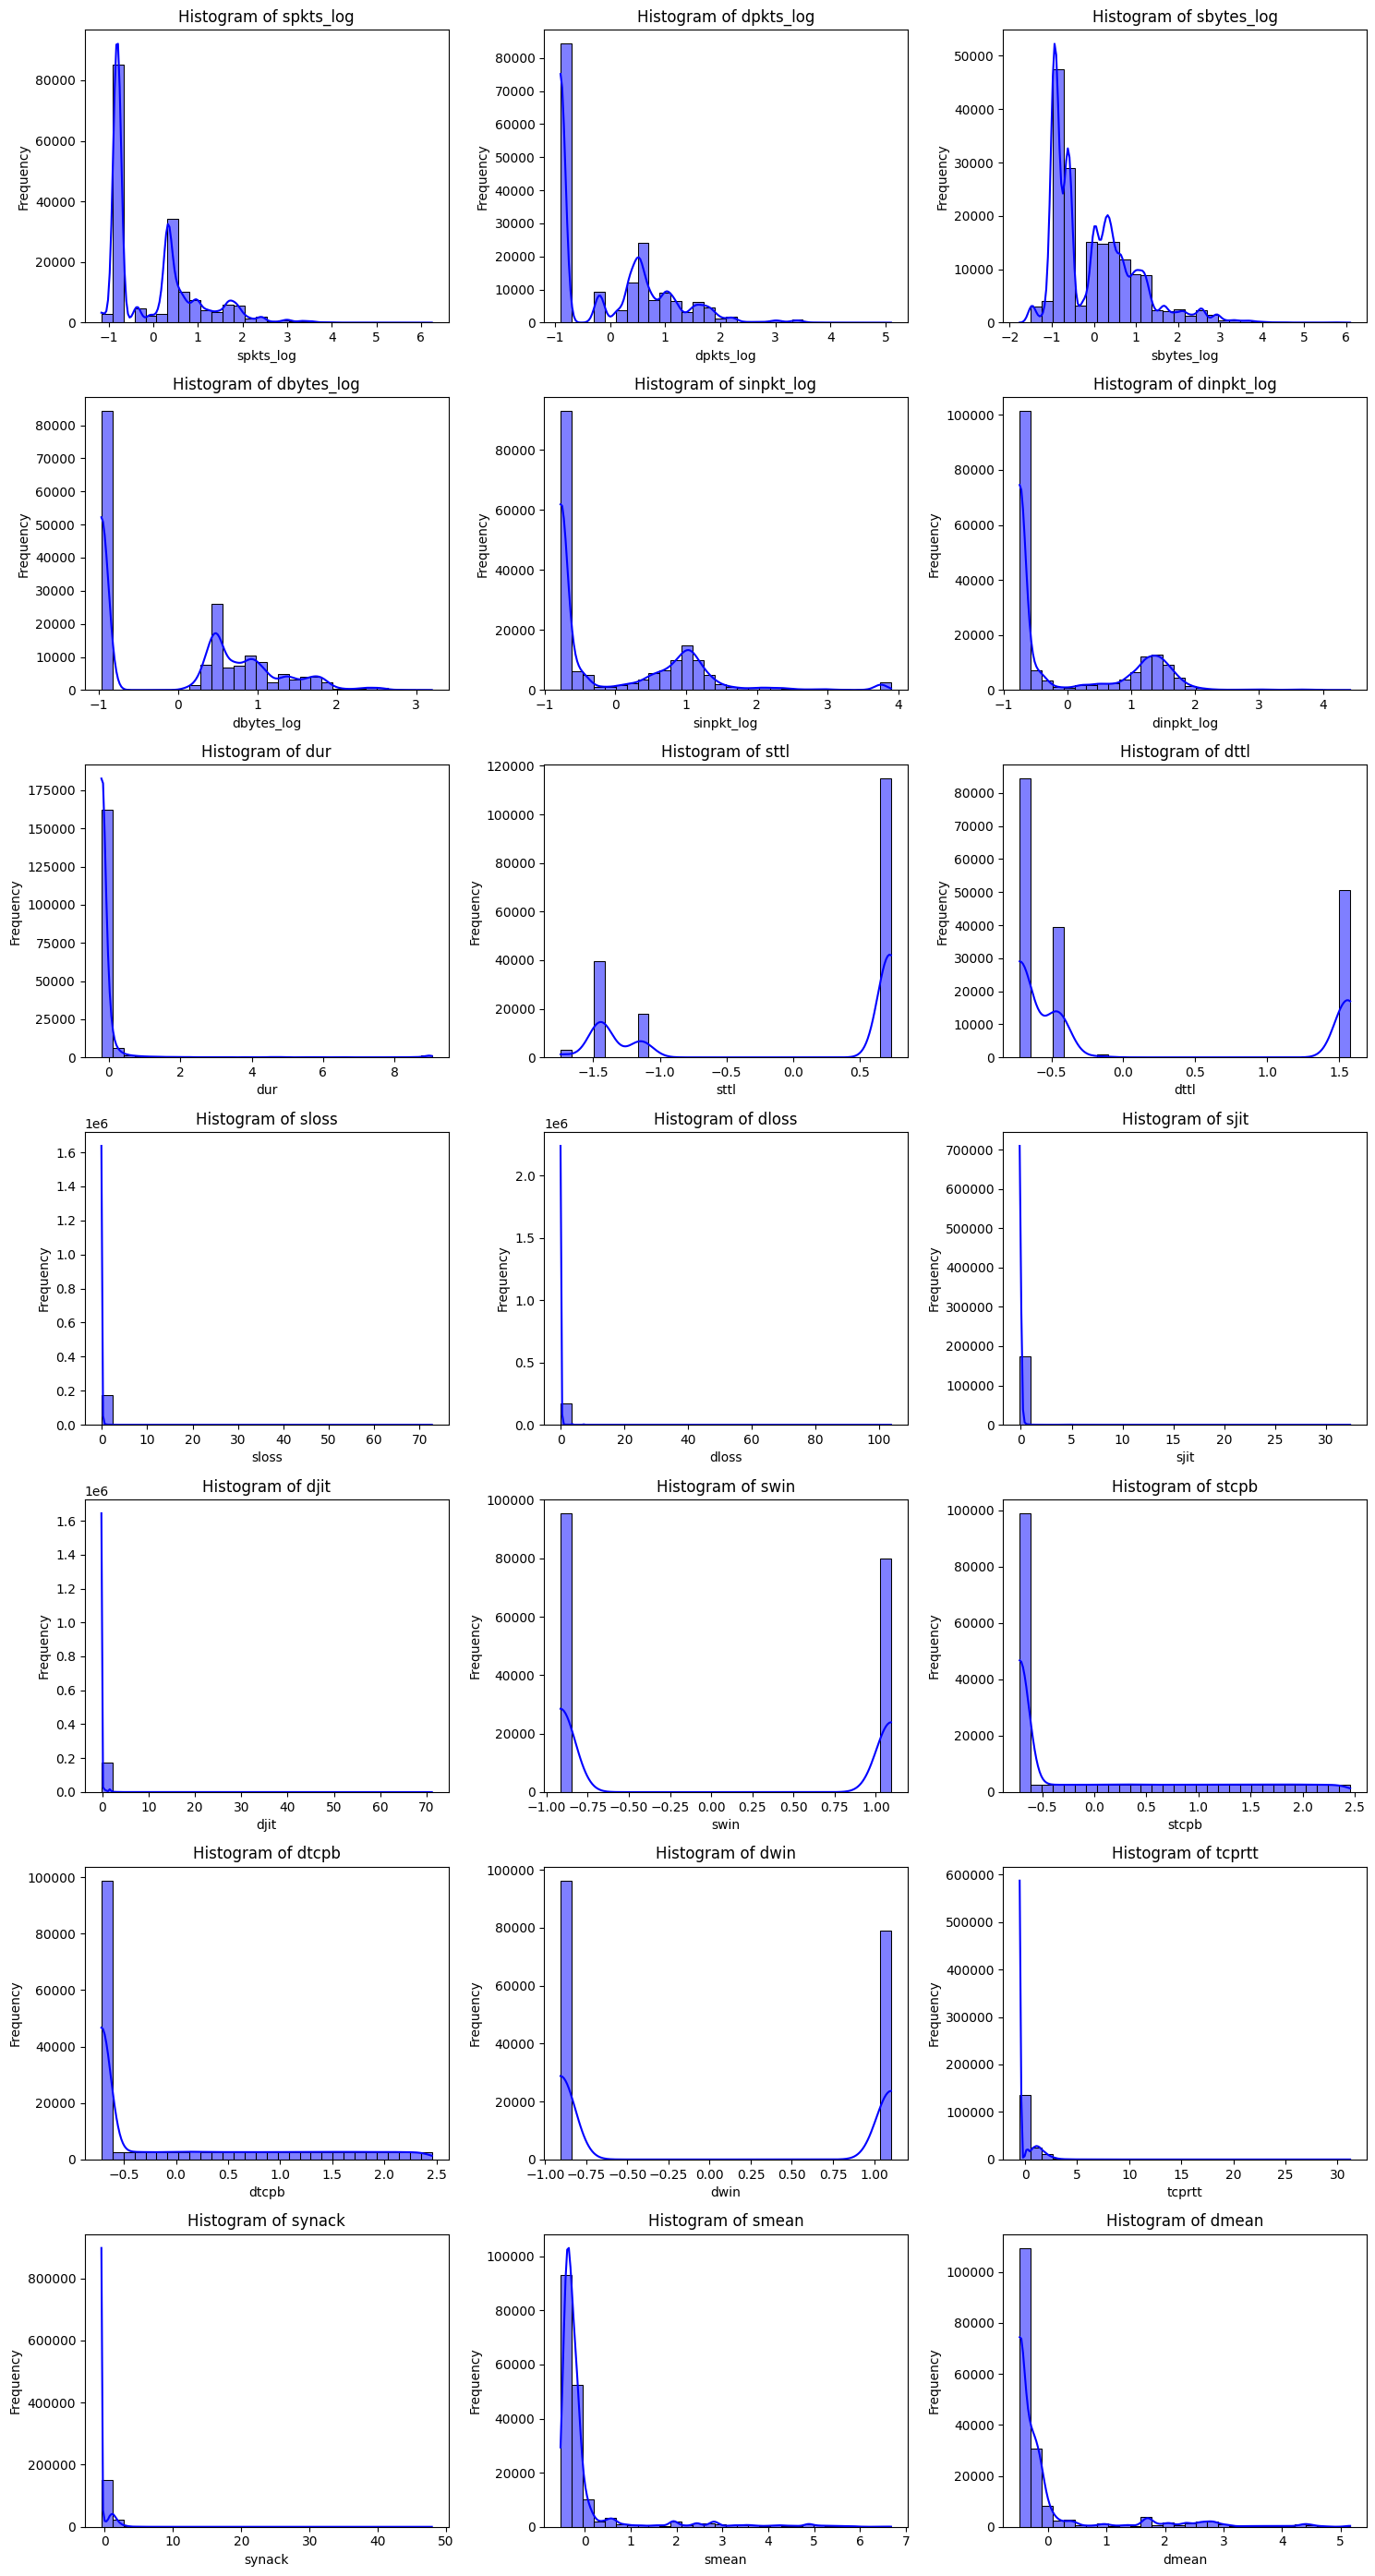

In [23]:
scaled_transformed_numerical_columns = ["spkts_log", "dpkts_log", "sbytes_log", "dbytes_log", "sinpkt_log", "dinpkt_log", "dur", "sttl", "dttl", "sloss", "dloss","sjit", "djit", "swin", "stcpb", "dtcpb", "dwin", "tcprtt", "synack", "smean", "dmean"]
visualize_numerical_columns(scaled_train_df, scaled_transformed_numerical_columns)

In [24]:
delete_columns(train_df, skewed_features)
delete_columns(test_df, skewed_features)

### handling non-numerical columns

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

def visualize_pca(df):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df)

    plt.figure(figsize=(8,6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
    plt.title("PCA: First two components")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

def handle_non_numerical_columns(df):

  # Apply one-hot encoding
  encoder = OneHotEncoder(sparse_output=False)
  proto_encoded = encoder.fit_transform(df[["proto"]])

  # Apply PCA to reduce dimensions
  pca = PCA(n_components=10)  # Adjust n_components as needed
  proto_reduced = pca.fit_transform(proto_encoded)

  # Add back to the main dataframe
  proto_reduced_df = pd.DataFrame(proto_reduced, columns=[f"proto_{i+1}" for i in range(proto_reduced.shape[1])])
  data = pd.concat([df.drop(columns=["proto"]), proto_reduced_df], axis=1)

  # Convert column names to string if needed
  data.columns = data.columns.astype(str) # ensures all column names are strings

  # Visualize PCA (2D plot)
  visualize_pca(data)

  return data

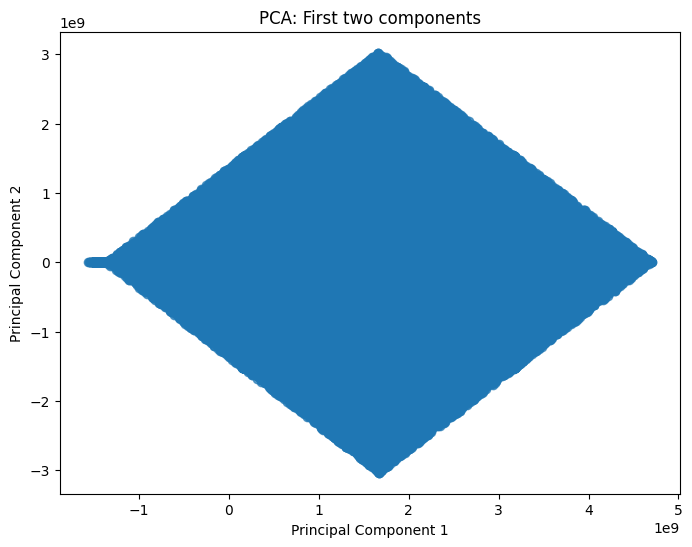

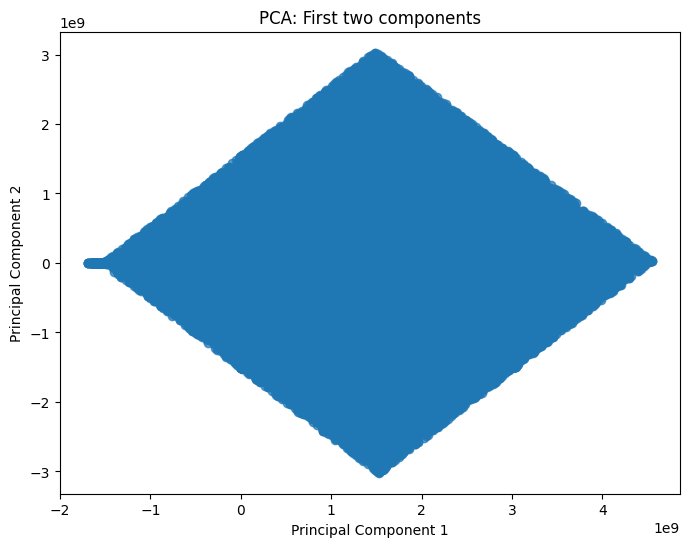

In [26]:
clean_train_df = handle_non_numerical_columns(train_df)
clean_test_df = handle_non_numerical_columns(test_df)

In [27]:
clean_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 35 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   dur         175341 non-null  float64
 1   sttl        175341 non-null  int64  
 2   dttl        175341 non-null  int64  
 3   sload       175341 non-null  float64
 4   dload       175341 non-null  float64
 5   sloss       175341 non-null  int64  
 6   dloss       175341 non-null  int64  
 7   sjit        175341 non-null  float64
 8   djit        175341 non-null  float64
 9   swin        175341 non-null  int64  
 10  stcpb       175341 non-null  int64  
 11  dtcpb       175341 non-null  int64  
 12  dwin        175341 non-null  int64  
 13  tcprtt      175341 non-null  float64
 14  synack      175341 non-null  float64
 15  ackdat      175341 non-null  float64
 16  smean       175341 non-null  int64  
 17  dmean       175341 non-null  int64  
 18  label       175341 non-null  int64  
 19  sp

In [28]:
clean_train_df.head()

,dur,sttl,dttl,sload,dload,sloss,dloss,sjit,djit,swin,...,proto_1,proto_2,proto_3,proto_4,proto_5,proto_6,proto_7,proto_8,proto_9,proto_10
0,0.121478,252,254,14158.942380,8495.365234,0,0,30.177547,11.830604,255,...,0.644547,-0.123588,0.029032,0.001203,0.004577,0.001398,0.000053,0.000019,-7.045371e-18,-6.192833e-19
1,0.649902,62,252,8395.112305,503571.312500,2,17,61.426934,1387.778330,255,...,0.644547,-0.123588,0.029032,0.001203,0.004577,0.001398,0.000053,0.000019,-7.045371e-18,-6.192833e-19
2,1.623129,62,252,1572.271851,60929.230470,1,6,17179.586860,11420.926230,255,...,0.644547,-0.123588,0.029032,0.001203,0.004577,0.001398,0.000053,0.000019,-7.045371e-18,-6.192833e-19
3,1.681642,62,252,2740.178955,3358.622070,1,3,259.080172,4991.784669,255,...,0.644547,-0.123588,0.029032,0.001203,0.004577,0.001398,0.000053,0.000019,-7.045371e-18,-6.192833e-19
4,0.449454,254,252,8561.499023,3987.059814,2,1,2415.837634,115.807000,255,...,0.644547,-0.123588,0.029032,0.001203,0.004577,0.001398,0.000053,0.000019,-7.045371e-18,-6.192833e-19


# Split Data

In [29]:
from sklearn.model_selection import train_test_split

# Separate features and target variable in the training set
X_train = clean_train_df.drop(columns=['label'])
y_train = clean_train_df['label']

# Separate features and target variable in the testing set
X_test = clean_test_df.drop(columns=['label'])
y_test = clean_test_df['label']


# Create small and large training + validation sets
X_train_large, X_train_small, y_train_large, y_train_small = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
X_train_large, X_val_large, y_train_large, y_val_large = train_test_split(X_train_large, y_train_large, test_size=0.2, random_state=42)

# Further split the main training set into a smaller subset for quick experimentation before training remaining datasets
X_val_large, X_val_small, y_val_large, y_val_small = train_test_split(X_val_large, y_val_large, test_size=0.2, random_state=42)


# Check shapes
print(f"Training - Large: [{X_train_large.shape},{y_train_large.shape}]")
print(f"Training - Small: [{X_train_small.shape},{y_train_small.shape}]")
print(f"Validation - Large: [{X_val_large.shape},{y_val_large.shape}]")
print(f"Validation - Small: [{X_val_small.shape},{y_val_small.shape}]")
print(f"Testing: [{X_test.shape},{y_test.shape}]")

Training - Large: [(126244, 34),(126244,)]
Training - Small: [(17535, 34),(17535,)]
Validation - Large: [(25249, 34),(25249,)]
Validation - Small: [(6313, 34),(6313,)]
Testing: [(82332, 34),(82332,)]


# Algorithms Considered & Metrics Used


## Model Evaluation Function

In [30]:
def evaluate_model(ground_truth_values, predicted_values):
  # Evaluate the model
  accuracy_log = accuracy_score(ground_truth_values, predicted_values)
  conf_matrix_log = confusion_matrix(ground_truth_values, predicted_values)
  class_report_log = classification_report(ground_truth_values, predicted_values, output_dict=True)

  # Print results
  print(f"Accuracy: {accuracy_log:.4f}")
  print(f"Confusion Matrix:\n{conf_matrix_log}")
  print(f"Classification Report:\n{class_report_log}")

  return accuracy_log, conf_matrix_log, class_report_log

## Logistic Regression

In [31]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_small, y_train_small)

LogisticRegression(max_iter=1000, random_state=42)

In [32]:
# Test predictions
y_pred = logistic_model.predict(X_val_small)
y_pred.shape

(6313,)

In [33]:
# Evaluate the model
accuracy_log = accuracy_score(y_val_small, y_pred)
conf_matrix_log = confusion_matrix(y_val_small, y_pred)
class_report_log = classification_report(y_val_small, y_pred, output_dict=True)

# Print results
print(f"Accuracy: {accuracy_log:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_log}")
print(f"Classification Report:\n{class_report_log}")

Accuracy: 0.8391
Confusion Matrix:
[[1150  856]
 [ 160 4147]]
Classification Report:
{'0': {'precision': 0.8778625954198473, 'recall': 0.5732801595214357, 'f1-score': 0.6936067551266586, 'support': 2006.0}, '1': {'precision': 0.828902658404957, 'recall': 0.9628511725098676, 'f1-score': 0.8908700322234157, 'support': 4307.0}, 'accuracy': 0.8390622524948519, 'macro avg': {'precision': 0.8533826269124022, 'recall': 0.7680656660156517, 'f1-score': 0.7922383936750371, 'support': 6313.0}, 'weighted avg': {'precision': 0.8444600215685669, 'recall': 0.8390622524948519, 'f1-score': 0.8281882432393993, 'support': 6313.0}}


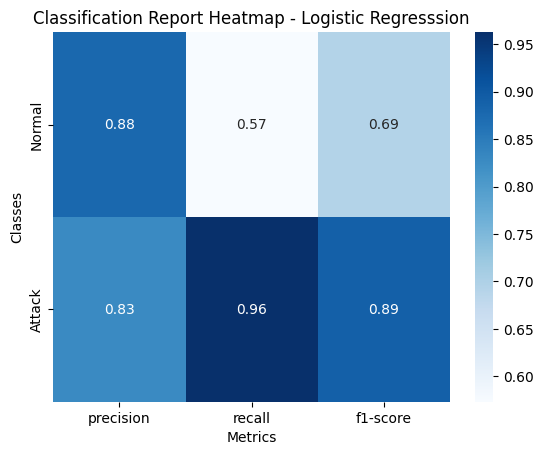

In [34]:
# Plot heatmap
df_report_log = pd.DataFrame(class_report_log).transpose()
df_report_log.rename(index={'0': 'Normal', '1': 'Attack'}, inplace=True)
metrics_log = df_report_log.iloc[:-3, :3]  # Exclude non-class rows

sns.heatmap(metrics_log, annot=True, cmap="Blues", fmt=".2f", cbar=True)
plt.title("Classification Report Heatmap - Logistic Regresssion")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

## Support Vector Machines


In [35]:
# Support Vector Machine
from sklearn.svm import SVC

# Initialize Support Vector Machine model
svm_model = SVC(probability=True)  # Enable probability for ROC-AUC
svm_model.fit(X_train_small, y_train_small)

SVC(probability=True)

In [36]:
# Test predictions
y_pred_svm = svm_model.predict(X_val_small)
y_pred_svm.shape

(6313,)

In [37]:
# Evaluate the model
accuracy_svm = accuracy_score(y_val_small, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_val_small, y_pred_svm)
class_report_svm = classification_report(y_val_small, y_pred_svm, output_dict=True)

# Print results
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_svm}")
print(f"Classification Report:\n{class_report_svm}")

Accuracy: 0.6857
Confusion Matrix:
[[ 482 1524]
 [ 460 3847]]
Classification Report:
{'0': {'precision': 0.5116772823779193, 'recall': 0.24027916251246262, 'f1-score': 0.32700135685210313, 'support': 2006.0}, '1': {'precision': 0.7162539564326941, 'recall': 0.8931971209658696, 'f1-score': 0.794998966728663, 'support': 4307.0}, 'accuracy': 0.6857278631395533, 'macro avg': {'precision': 0.6139656194053067, 'recall': 0.5667381417391661, 'f1-score': 0.561000161790383, 'support': 6313.0}, 'weighted avg': {'precision': 0.6512482843031395, 'recall': 0.6857278631395533, 'f1-score': 0.6462894458333075, 'support': 6313.0}}


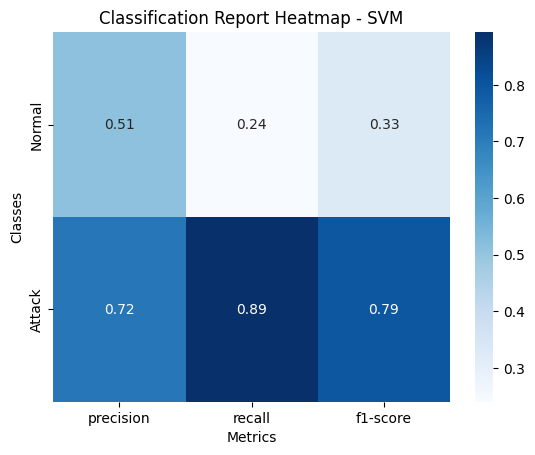

In [38]:
# Plot heatmap
df_report_svm = pd.DataFrame(class_report_svm).transpose()
df_report_svm.rename(index={'0': 'Normal', '1': 'Attack'}, inplace=True)
metrics_svm = df_report_svm.iloc[:-3, :3]  # Exclude non-class rows

sns.heatmap(metrics_svm, annot=True, cmap="Blues", fmt=".2f", cbar=True)
plt.title("Classification Report Heatmap - SVM")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

## KNN

In [39]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_small, y_train_small)

KNeighborsClassifier()

In [40]:
# Test predictions
y_pred_knn = knn_model.predict(X_val_small)
y_pred_knn.shape

(6313,)

In [41]:
# Evaluate the model
accuracy_knn = accuracy_score(y_val_small, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_val_small, y_pred_knn)
class_report_knn = classification_report(y_val_small, y_pred_knn, output_dict=True)

# Print results
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_knn}")
print(f"Classification Report:\n{class_report_knn}")

Accuracy: 0.8809
Confusion Matrix:
[[1568  438]
 [ 314 3993]]
Classification Report:
{'0': {'precision': 0.8331562167906482, 'recall': 0.7816550348953141, 'f1-score': 0.8065843621399177, 'support': 2006.0}, '1': {'precision': 0.9011509817197021, 'recall': 0.9270954260506152, 'f1-score': 0.9139391165026322, 'support': 4307.0}, 'accuracy': 0.8808807223190243, 'macro avg': {'precision': 0.8671535992551751, 'recall': 0.8543752304729646, 'f1-score': 0.8602617393212749, 'support': 6313.0}, 'weighted avg': {'precision': 0.8795451685646757, 'recall': 0.8808807223190243, 'f1-score': 0.8798263908172836, 'support': 6313.0}}


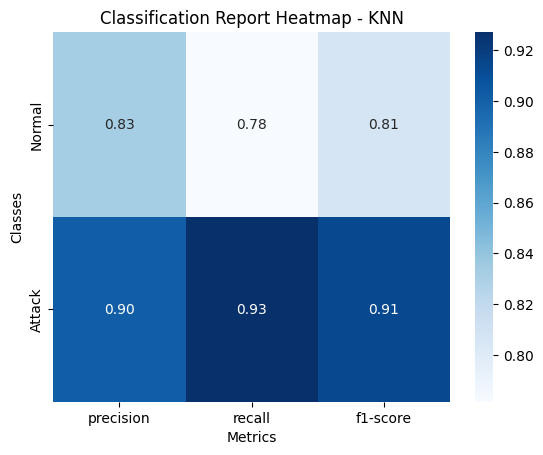

In [42]:
# Plot heatmap
df_report_knn = pd.DataFrame(class_report_knn).transpose()
df_report_knn.rename(index={'0': 'Normal', '1': 'Attack'}, inplace=True)
metrics_knn = df_report_knn.iloc[:-3, :3]  # Exclude non-class rows

sns.heatmap(metrics_knn, annot=True, cmap="Blues", fmt=".2f", cbar=True)
plt.title("Classification Report Heatmap - KNN")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

## Multi-Layer Perceptron (MLP) Classifier

In [43]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier

# Initialize MLP Classifier model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, early_stopping=True, validation_fraction=0.1)
mlp_model.fit(X_train_small, y_train_small)

MLPClassifier(early_stopping=True, max_iter=500)

In [44]:
# Test predictions
y_pred_mlp = mlp_model.predict(X_val_small)
y_pred_mlp.shape

(6313,)

In [45]:
# Evaluate the model
accuracy_mlp = accuracy_score(y_val_small, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_val_small, y_pred_mlp)
class_report_mlp = classification_report(y_val_small, y_pred_mlp, output_dict=True)

# Print results
print(f"Accuracy: {accuracy_mlp:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_mlp}")
print(f"Classification Report:\n{class_report_mlp}")

Accuracy: 0.8673
Confusion Matrix:
[[1271  735]
 [ 103 4204]]
Classification Report:
{'0': {'precision': 0.9250363901018923, 'recall': 0.6335992023928215, 'f1-score': 0.7520710059171598, 'support': 2006.0}, '1': {'precision': 0.8511844502935817, 'recall': 0.9760854423032274, 'f1-score': 0.90936621241618, 'support': 4307.0}, 'accuracy': 0.8672580389672105, 'macro avg': {'precision': 0.888110420197737, 'recall': 0.8048423223480244, 'f1-score': 0.8307186091666698, 'support': 6313.0}, 'weighted avg': {'precision': 0.874651421821456, 'recall': 0.8672580389672105, 'f1-score': 0.8593845580146222, 'support': 6313.0}}


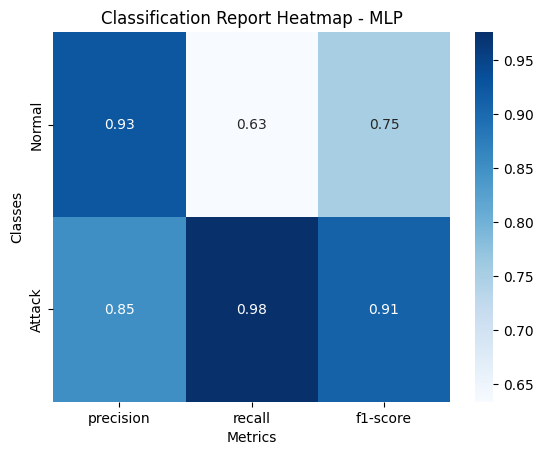

In [46]:
# Plot heatmap
df_report_mlp = pd.DataFrame(class_report_mlp).transpose()
df_report_mlp.rename(index={'0': 'Normal', '1': 'Attack'}, inplace=True)
metrics_mlp = df_report_mlp.iloc[:-3, :3]  # Exclude non-class rows

sns.heatmap(metrics_mlp, annot=True, cmap="Blues", fmt=".2f", cbar=True)
plt.title("Classification Report Heatmap - MLP")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

## Naive Bayes

In [47]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_small, y_train_small)

GaussianNB()

In [48]:
# Test predictions
y_pred_nb = naive_bayes_model.predict(X_val_small)
y_pred_nb.shape

(6313,)

In [49]:
# Evaluate the model
accuracy_nb = accuracy_score(y_val_small, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_val_small, y_pred_nb)
class_report_nb = classification_report(y_val_small, y_pred_nb, output_dict=True)

# Print results
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_nb}")
print(f"Classification Report:\n{class_report_nb}")

Accuracy: 0.8329
Confusion Matrix:
[[1038  968]
 [  87 4220]]
Classification Report:
{'0': {'precision': 0.9226666666666666, 'recall': 0.5174476570289133, 'f1-score': 0.663046949856276, 'support': 2006.0}, '1': {'precision': 0.8134155744024673, 'recall': 0.9798003250522406, 'f1-score': 0.8888888888888888, 'support': 4307.0}, 'accuracy': 0.8328845239980992, 'macro avg': {'precision': 0.868041120534567, 'recall': 0.748623991040577, 'f1-score': 0.7759679193725824, 'support': 6313.0}, 'weighted avg': {'precision': 0.8481308747481008, 'recall': 0.8328845239980992, 'f1-score': 0.8171260297570305, 'support': 6313.0}}


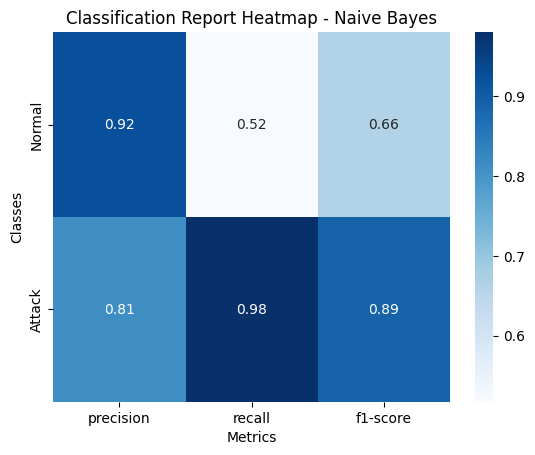

In [50]:
# Plot heatmap
df_report_nb = pd.DataFrame(class_report_nb).transpose()
df_report_nb.rename(index={'0': 'Normal', '1': 'Attack'}, inplace=True)
metrics_nb = df_report_nb.iloc[:-3, :3]  # Exclude non-class rows

sns.heatmap(metrics_nb, annot=True, cmap="Blues", fmt=".2f", cbar=True)
plt.title("Classification Report Heatmap - Naive Bayes")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

# Model Comparisons

Logistic Regression: 0.8390622524948519
Support Vector Machines: 0.6857278631395533
KNN: 0.8808807223190243
Multi-Layer Precptron (MLP): 0.8672580389672105
Naive Bayes: 0.8328845239980992



Text(0.5, 1.0, 'Accuracy Across Models')

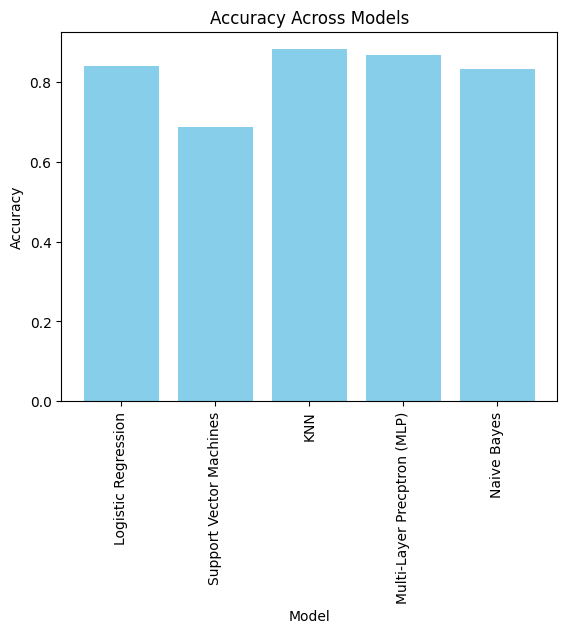

In [51]:
# Example accuracies for three models
models = ["Logistic Regression", "Support Vector Machines", "KNN", "Multi-Layer Precptron (MLP)", "Naive Bayes"]
accuracies = {}
accuracies["Logistic Regression"] = accuracy_log
accuracies["Support Vector Machines"] = accuracy_svm
accuracies["KNN"] = accuracy_knn
accuracies["Multi-Layer Precptron (MLP)"] = accuracy_mlp
accuracies["Naive Bayes"] = accuracy_nb


for model in models:
    print(f"{model}: {accuracies[model]}")
print()

# Plotting
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel("Model")
plt.xticks(rotation=90)
plt.ylabel("Accuracy")
plt.title("Accuracy Across Models")

In [52]:
reports = {}
reports["Logistic Regression"] = class_report_log
reports["Support Vector Machines"] = class_report_svm
reports["KNN"] = class_report_knn
reports["Multi-Layer Precptron (MLP)"] = class_report_mlp
reports["Naive Bayes"] = class_report_nb


 Logistic Regression
0: 0.6936067551266586
1: 0.8908700322234157

 Support Vector Machines
0: 0.32700135685210313
1: 0.794998966728663

 KNN
0: 0.8065843621399177
1: 0.9139391165026322

 Multi-Layer Precptron (MLP)
0: 0.7520710059171598
1: 0.90936621241618

 Naive Bayes
0: 0.663046949856276
1: 0.8888888888888888


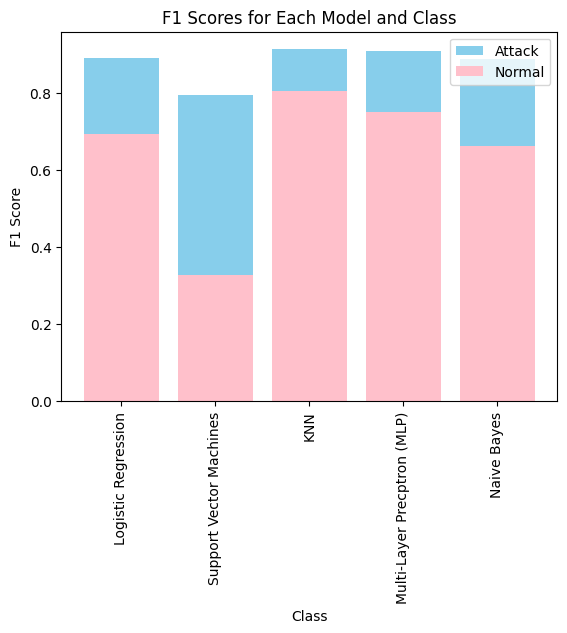

In [53]:
f1_scores_normal = []
f1_scores_attack = []

for name in reports:
  print("\n", name)
  for key, value in reports[name].items():
    if key == "0":
      print(f"{key}: {value['f1-score']}")
    elif key == "1":
      print(f"{key}: {value['f1-score']}")

plt.bar(reports.keys(), [reports[name]["1"]["f1-score"] for name in reports], color='skyblue', label='Attack')
plt.bar(reports.keys(), [reports[name]["0"]["f1-score"] for name in reports], color='pink', label='Normal')
plt.xlabel("Model")
plt.xticks(rotation=90)
plt.title("F1 Scores for Each Model and Class")
plt.ylabel("F1 Score")
plt.xlabel("Class")
plt.legend()
plt.show()

## KNN Model Learning Curve

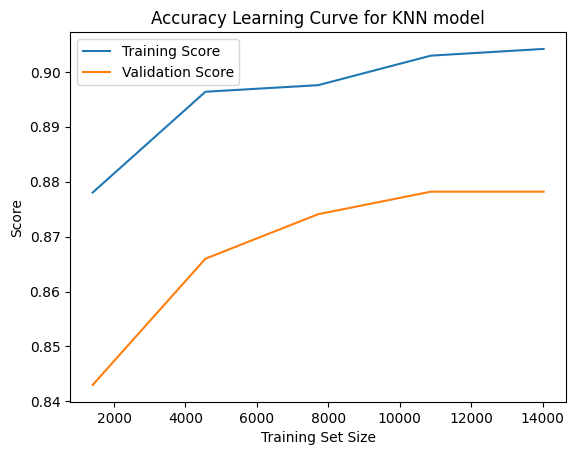

In [54]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(knn_model, X_train_small, y_train_small, scoring='accuracy')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.title('Accuracy Learning Curve for KNN model')
plt.show()

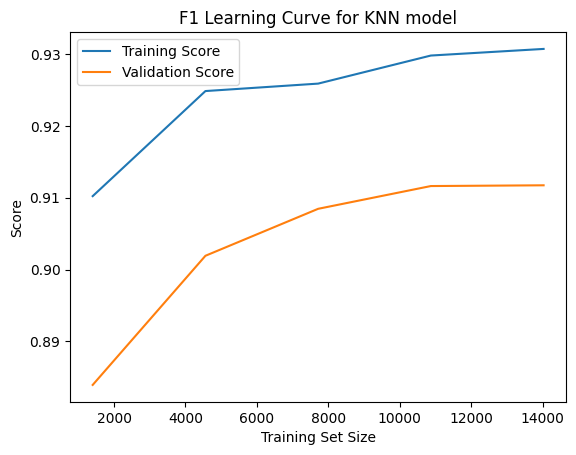

In [55]:
train_sizes, train_scores, val_scores = learning_curve(knn_model, X_train_small, y_train_small, scoring='f1')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.title('F1 Learning Curve for KNN model')
plt.show()

## MLP Model Learning Curve

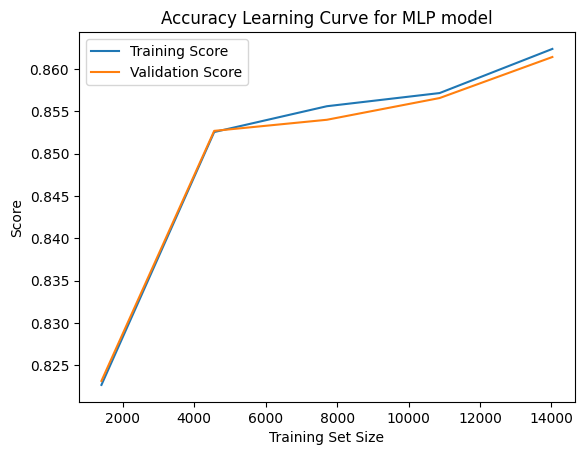

In [56]:
train_sizes, train_scores, val_scores = learning_curve(mlp_model, X_train_small, y_train_small, scoring='accuracy')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.title('Accuracy Learning Curve for MLP model')
plt.show()

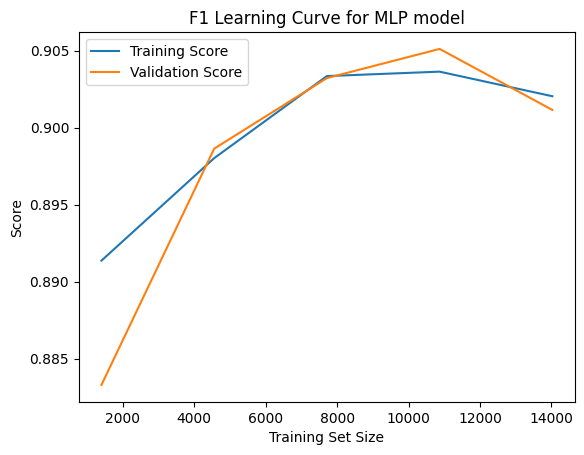

In [57]:
train_sizes, train_scores, val_scores = learning_curve(mlp_model, X_train_small, y_train_small, scoring='f1')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.title('F1 Learning Curve for MLP model')
plt.show()

## Hyperparameter Tuning
From the above training, the accuracy and f1 score is best observed by the MLP and KNN models.
Both have their pros and cons. For MLP, we notice the training and validation learning curves have the best performance.

In [58]:
# Initialize MLP Classifier model
mlp_model_final = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, early_stopping=True, validation_fraction=0.1, shuffle=False)
mlp_model_final.fit(X_train_large, y_train_large)

# Test predictions
y_pred_mlp = mlp_model_final.predict(X_val_large)
y_pred_mlp.shape

(25249,)

In [59]:
accuracy_log_mlp, conf_matrix_log_mlp, class_report_log_mlp =  evaluate_model(y_val_large, y_pred_mlp)

Accuracy: 0.8565
Confusion Matrix:
[[ 4845  3265]
 [  359 16780]]
Classification Report:
{'0': {'precision': 0.9310146041506533, 'recall': 0.5974106041923551, 'f1-score': 0.7278053177106805, 'support': 8110.0}, '1': {'precision': 0.83711648790222, 'recall': 0.9790536203979229, 'f1-score': 0.9025387263339071, 'support': 17139.0}, 'accuracy': 0.8564695631510159, 'macro avg': {'precision': 0.8840655460264366, 'recall': 0.788232112295139, 'f1-score': 0.8151720220222938, 'support': 25249.0}, 'weighted avg': {'precision': 0.8672766416815695, 'recall': 0.8564695631510159, 'f1-score': 0.8464142087714545, 'support': 25249.0}}


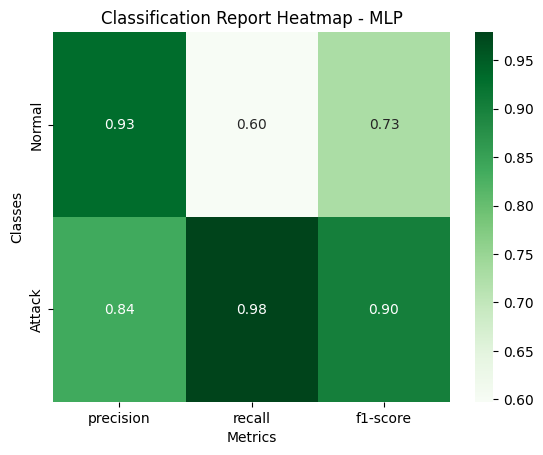

In [60]:
# Plot heatmap
df_report_mlp = pd.DataFrame(class_report_log_mlp).transpose()
df_report_mlp.rename(index={'0': 'Normal', '1': 'Attack'}, inplace=True)
metrics_mlp = df_report_mlp.iloc[:-3, :3]  # Exclude non-class rows

sns.heatmap(metrics_mlp, annot=True, cmap="Greens", fmt=".2f", cbar=True)
plt.title("Classification Report Heatmap - MLP")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

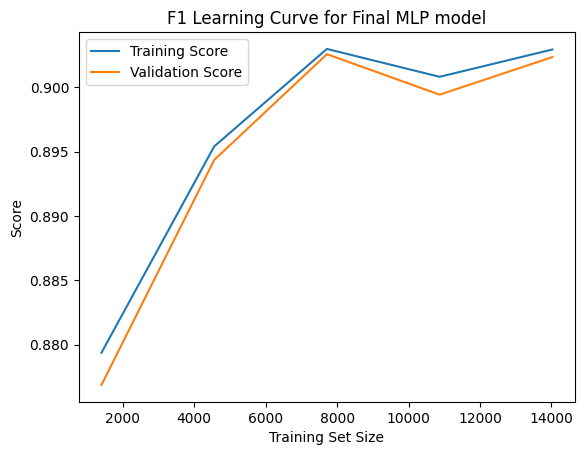

In [61]:
train_sizes_final, train_scores_final, val_scores_final = learning_curve(mlp_model, X_train_small, y_train_small, scoring='f1')

plt.plot(train_sizes_final, train_scores_final.mean(axis=1), label='Training Score')
plt.plot(train_sizes_final, val_scores_final.mean(axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()
plt.title('F1 Learning Curve for Final MLP model')
plt.show()

In [62]:
# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_large, y_train_large)

# Test predictions
y_pred_knn = knn_model.predict(X_val_large)
y_pred_knn.shape

(25249,)

In [63]:
evaluate_model(y_val_large, y_pred_knn)

Accuracy: 0.8926
Confusion Matrix:
[[ 6378  1732]
 [  980 16159]]
Classification Report:
{'0': {'precision': 0.8668116335960859, 'recall': 0.7864364981504316, 'f1-score': 0.8246702870442203, 'support': 8110.0}, '1': {'precision': 0.9031915488234308, 'recall': 0.9428204679386195, 'f1-score': 0.9225806451612903, 'support': 17139.0}, 'accuracy': 0.892589805536853, 'macro avg': {'precision': 0.8850015912097584, 'recall': 0.8646284830445256, 'f1-score': 0.8736254661027554, 'support': 25249.0}, 'weighted avg': {'precision': 0.891506289506477, 'recall': 0.892589805536853, 'f1-score': 0.8911317559249072, 'support': 25249.0}}


(0.892589805536853,
 array([[ 6378,  1732],
        [  980, 16159]]),
 {'0': {'precision': 0.8668116335960859,
   'recall': 0.7864364981504316,
   'f1-score': 0.8246702870442203,
   'support': 8110.0},
  '1': {'precision': 0.9031915488234308,
   'recall': 0.9428204679386195,
   'f1-score': 0.9225806451612903,
   'support': 17139.0},
  'accuracy': 0.892589805536853,
  'macro avg': {'precision': 0.8850015912097584,
   'recall': 0.8646284830445256,
   'f1-score': 0.8736254661027554,
   'support': 25249.0},
  'weighted avg': {'precision': 0.891506289506477,
   'recall': 0.892589805536853,
   'f1-score': 0.8911317559249072,
   'support': 25249.0}})

# Pickle and Store MLP Model

In [64]:
import pickle
# Define the path in Google Drive
file_path = '/content/drive/MyDrive/MS AI/F2024/CMPE 295B/Shared CMPE 295A B Folder/Assignments/CMPE 295B Assignments/Final ML Model/'

# Save the mlp model to a file
with open(f'{file_path}traffic_mlp_model.pkl', 'wb') as file:
    pickle.dump(mlp_model_final, file)
print("Model saved to 'traffic_mlp_model.pkl'")


Model saved to 'traffic_mlp_model.pkl'


In [65]:
clean_test_df.head()

,dur,sttl,dttl,sload,dload,sloss,dloss,sjit,djit,swin,...,proto_1,proto_2,proto_3,proto_4,proto_5,proto_6,proto_7,proto_8,proto_9,proto_10
0,0.000011,254,0,180363632.0,0.0,0,0,0.0,0.0,0,...,-0.821109,-0.119643,0.023334,0.003599,0.003163,0.000908,0.000041,0.000044,0.000013,0.000013
1,0.000008,254,0,881000000.0,0.0,0,0,0.0,0.0,0,...,-0.821109,-0.119643,0.023334,0.003599,0.003163,0.000908,0.000041,0.000044,0.000013,0.000013
2,0.000005,254,0,854400000.0,0.0,0,0,0.0,0.0,0,...,-0.821109,-0.119643,0.023334,0.003599,0.003163,0.000908,0.000041,0.000044,0.000013,0.000013
3,0.000006,254,0,600000000.0,0.0,0,0,0.0,0.0,0,...,-0.821109,-0.119643,0.023334,0.003599,0.003163,0.000908,0.000041,0.000044,0.000013,0.000013
4,0.000010,254,0,850400000.0,0.0,0,0,0.0,0.0,0,...,-0.821109,-0.119643,0.023334,0.003599,0.003163,0.000908,0.000041,0.000044,0.000013,0.000013


In [66]:
with open(f'{file_path}traffic_mlp_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print("Model loaded successfully")

# Test the loaded model
sample_features = clean_test_df.head().drop(columns=['label'])
print("Sample features:")
print(sample_features)
prediction = loaded_model.predict(sample_features)
print("Prediction:", prediction)


Model loaded successfully
Sample features:
        dur  sttl  dttl        sload  dload  sloss  dloss  sjit  djit  swin  \
0  0.000011   254     0  180363632.0    0.0      0      0   0.0   0.0     0   
1  0.000008   254     0  881000000.0    0.0      0      0   0.0   0.0     0   
2  0.000005   254     0  854400000.0    0.0      0      0   0.0   0.0     0   
3  0.000006   254     0  600000000.0    0.0      0      0   0.0   0.0     0   
4  0.000010   254     0  850400000.0    0.0      0      0   0.0   0.0     0   

   ...   proto_1   proto_2   proto_3   proto_4   proto_5   proto_6   proto_7  \
0  ... -0.821109 -0.119643  0.023334  0.003599  0.003163  0.000908  0.000041   
1  ... -0.821109 -0.119643  0.023334  0.003599  0.003163  0.000908  0.000041   
2  ... -0.821109 -0.119643  0.023334  0.003599  0.003163  0.000908  0.000041   
3  ... -0.821109 -0.119643  0.023334  0.003599  0.003163  0.000908  0.000041   
4  ... -0.821109 -0.119643  0.023334  0.003599  0.003163  0.000908  0.000041   

 

In [67]:
# Save model to computer
from google.colab import files

files.download(f'{file_path}traffic_mlp_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>